# 1. Import Library

In [317]:
import pandas as pd # berfungsi untuk mengolah data dalam bentuk tabel
import numpy as np # berfungsi untuk mengolah data numerik dan array multidimensi 
import matplotlib.pyplot as plt # berfungsi untuk membuat visualisasi data
import seaborn as sns # berfungsi untuk membuat visualisasi data yang lebih menarik
import plotly.graph_objs as go
import plotly as py

from sklearn.metrics import pairwise_distances_argmin # berfungsi untuk menghitung jarak antar titik
from sklearn.cluster import KMeans # berfungsi untuk melakukan clustering
from sklearn.preprocessing import LabelEncoder # berfungsi untuk mengubah data kategorikal menjadi numerik
from IPython.display import display # berfungsi untuk menampilkan data dalam bentuk tabel


import warnings # berfungsi untuk mengabaikan peringatan
warnings.filterwarnings('ignore') # berfungsi untuk mengabaikan peringatan

plt.style.use('fivethirtyeight') # berfungsi untuk mengubah tampilan visualisasi data

# 2. Data Exploration atau EDA

In [318]:
data = pd.read_csv('Mall_Customers.csv') # berfungsi untuk membaca file csv
data.head(10) # berfungsi untuk menampilkan 10 data pertama

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [319]:
print(f'(Baris, Kolom) = {data.shape}') # berfungsi untuk menampilkan jumlah baris dan kolom

(Baris, Kolom) = (200, 5)


In [320]:
print(data.dtypes) # berfungsi untuk menampilkan tipe data dari setiap kolom atau atribut

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object


In [321]:
print(data.isnull().sum()) # berfungsi untuk menampilkan jumlah data yang kosong

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [322]:
data = data.drop(['CustomerID'], axis=1) # berfungsi untuk menghapus kolom CustomerID

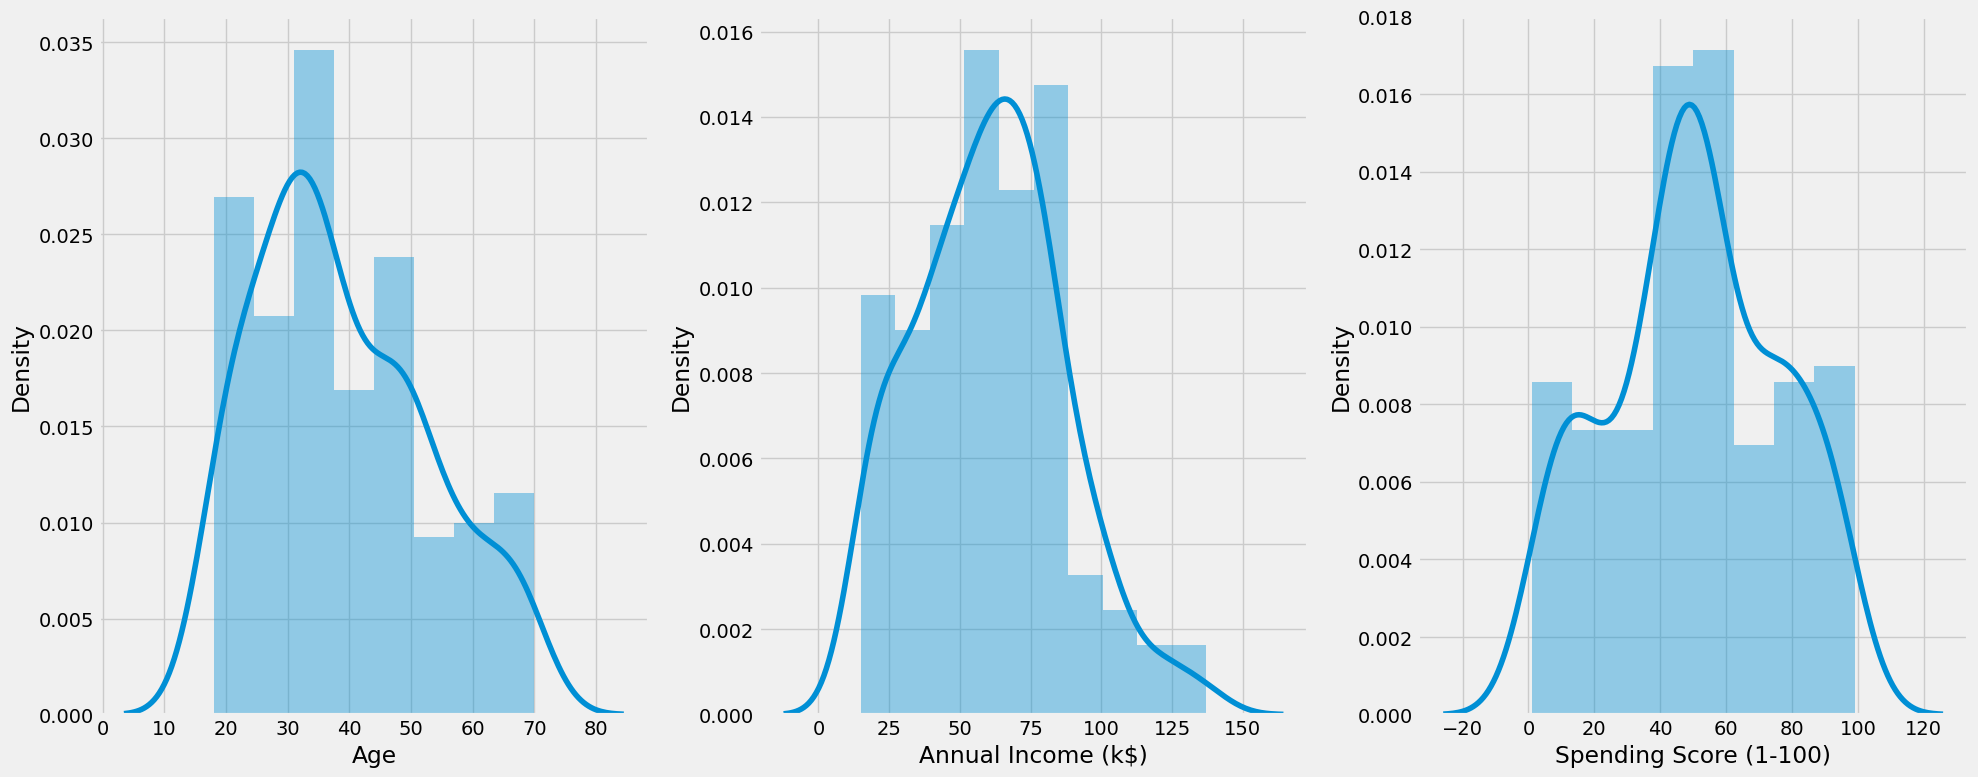

In [323]:
# Plot Distribusi Data

plt.figure(figsize = (20, 8)) # berfungsi untuk mengatur ukuran gambar ukuran gambar (lebar, tinggi)
plotnumber = 1 # berfungsi untuk mengatur jumlah plot

for col in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']: # berfungsi untuk mengambil data dari kolom Age, Annual Income (k$), dan Spending Score (1-100)
    if plotnumber <= 3: # berfungsi untuk mengatur jumlah plot
        ax = plt.subplot(1, 3, plotnumber) # berfungsi untuk mengatur jumlah plot
        sns.distplot(data[col]) # berfungsi untuk membuat plot distribusi data
        
    plotnumber += 1 # berfungsi untuk mengatur jumlah plot
    
plt.tight_layout() # berfungsi untuk mengatur layout
plt.show() # berfungsi untuk menampilkan plot

**Catatan**
1. Kelompok usia antara 30-40 memiliki tingkat kepadatan tertinggi
2. Sebagian besar pelanggan memiliki pendapatan dikisaran 50$-80$
3. Sebagian besar pelanggan memiliki spending skor 40-60

# 3. Simple Preprocessing

In [324]:
encoder = LabelEncoder() # berfungsi untuk mengubah data kategorikal menjadi numerik
data['Gender'] = encoder.fit_transform(data['Gender'])
display(data.head(10))

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
5,0,22,17,76
6,0,35,18,6
7,0,23,18,94
8,1,64,19,3
9,0,30,19,72


# 4. Clustering

## 4.1 Fungsi Find Cluster From Scrach

In [325]:
def find_clusters(data, n_clusters, rseed=2): # membuat sebuah fungsi untuk menemukan cluster dari data yang diberikan
    # 1. Memilih Cluster Secara Acak
    rng = np.random.RandomState(rseed) # membuat sebuah objek random state dengan seed 2
    i = rng.permutation(data.shape[0])[:n_clusters] # mengambil n_clusters data secara acak dari data yang diberikan
    centers = data[i] # membuat sebuah array yang berisi data yang telah diambil sebelumnya sebagai center dari cluster
    
    while True:
        # 2a. Menentukan label untuk setiap data
        labels = pairwise_distances_argmin(data, centers) # menghitung jarak antara setiap data dengan center dari cluster
        
        # 2b. Menemukan cluster baru dari data
        new_centers = np.array([data[labels == i].mean(0) for i in range(n_clusters)]) # menghitung rata-rata dari setiap cluster untuk mendapatkan center baru dari cluster tersebut
        inertia_ = np.sum((data - centers[labels]) ** 2) # Inersia mengukur seberapa baik kumpulan data dikelompokkan oleh K-Means. Ini dihitung dengan mengukur jarak antara setiap titik data dan pusat massanya, mengkuadratkan jarak ini, dan menjumlahkan kuadrat ini di satu cluster.
        
        # 2c. Cek apakah cluster sudah stabil atau convergen
        if np.all(centers == new_centers): # berfungsi untuk mengecek apakah center dari cluster sudah stabil atau belum
            break # berfungsi untuk menghentikan perulangan
        centers = new_centers # berfungsi untuk mengganti center dari cluster dengan center baru dari cluster
        
    return inertia_, centers, labels # berfungsi untuk mengembalikan nilai inertia, center, dan label

## 4.2 Fungsi Mencari Cluster Menggunakan Libray K-Means

In [326]:
k_means = KMeans() # membuat objek KMeans

## 4.3 Segmentasi Pelanggaran Berdasarkan (Age, Annual Income (k$), Spending Score (1-100))

1. Atribut Age dan Annuel Income
2. Atribut Age dan Spending Score
3. Atribut Annual Income dan Spending Score
4. Attibut Age, Annual Income dan Spending Score

In [327]:
def k_optimum(data): # membuat sebuah fungsi untuk menentukan nilai optimum dari K
    # Menentukan nilai k yang optimal dengan metode elbow menggunakan find cluster from scratch
    inertia_scratch = [] # membuat sebuah list untuk menampung nilai inertia
    y_scratch = [] # membuat sebuah list untuk menampung nilai y

    for n in range(1,11): # befungsi untuk menentukan nilai n dari 1 sampai 10
        inertia_, _, labels = find_clusters(data.values, n) # memanggil fungsi find_clusters dengan parameter data dan n
        inertia_scratch.append(inertia_) # menambahkan nilai inertia ke dalam list inertia_scratch
        y_scratch.append(labels) # menambahkan nilai n ke dalam list y_scratch
    
        
    

    # menentukan nilai k yang optimal dengan metode elbow method menggunakan KMeans dari sklearn
    inertia_kmeans = [] # membuat sebuah list untuk menampung nilai inertia
    y_means = [] # membuat sebuah list untuk menampung nilai y

    for n in range(1, 11): # befungsi untuk menentukan nilai n dari 1 sampai 10
        k_means = KMeans(n_clusters=n) # membuat objek KMeans dengan parameter n
        y_means.append(k_means.fit_predict(data)) # menambahkan nilai n ke dalam list y_means
        inertia_kmeans.append(k_means.fit(data).inertia_) # menambahkan nilai inertia ke dalam list inertia_kmeans
        

    # Plotting nilai k yang optimal
    plt.figure(1 , figsize = (15 ,6)) # berfungsi untuk mengatur ukuran gambar (lebar, tinggi)
    plt.title('Metode Elbow Menggunakan Find Cluster From Scratch dan KMeans dari Sklearn (Age dan Annual Income)') # berfungsi untuk memberikan judul pada plot
    plt.plot(np.arange(1 , 11) , inertia_scratch , 'o') # berfungsi untuk membuat plot nilai inertia_scratch
    plt.plot(np.arange(1 , 11) , inertia_scratch , '-' , alpha = 0.5, color = 'blue') # berfungsi untuk membuat plot nilai inertia_scratch
    plt.plot(np.arange(1 , 11) , inertia_kmeans , 'o') # berfungsi untuk membuat plot nilai inertia_kmeans
    plt.plot(np.arange(1 , 11) , inertia_kmeans , '-' , alpha = 0.5, color='red') # berfungsi untuk membuat plot nilai inertia_kmeans
    plt.xticks(np.arange(1,11,1)) # berfungsi untuk mengatur nilai x pada plot
    plt.xlabel('Cluster') , plt.ylabel('Inertia') # berfungsi untuk memberikan label pada sumbu x dan y
    plt.show() # berfungsi untuk menampilkan plot

In [328]:
def clustering(data, n_clusters): # membuat sebuah fungsi untuk melakukan clustering
    # Clustering Menggunakan Find Cluster From Scratch
    _, centers_scratch, labels_scratch = find_clusters(data.values, n_clusters) # menemukan cluster dari data dengan nilai k = n_clusters
    
    data_baru = data.copy() # membuat sebuah dataframe baru yang berisi data
    data_baru['segmentasi'] = labels_scratch # menambahkan kolom segmentasi pada dataframe data_baru
    filename = 'scratch_' + data.columns[0] + ' dan ' + data.columns[1] + ' dengan ' + str(n_clusters) + ' cluster.csv' # membuat sebuah variabel filename yang berisi nama kolom pada data dan nilai n_clusters
    data_baru.to_csv(filename, index=False) # menyimpan dataframe data_baru ke dalam file csv


    # Clustering Menggunakan KMeans dari Sklearn
    k_means = KMeans(n_clusters=n_clusters) # membuat objek KMeans dengan nilai k = n_clusters
    y_kmeans = k_means.fit_predict(data.values) # menemukan cluster dari data
    centers_kmeans = k_means.cluster_centers_ # menemukan center dari setiap cluster
    
    data_baru = data.copy() # membuat sebuah dataframe baru yang berisi data
    data_baru['segmentasi'] = y_kmeans # menambahkan kolom segmentasi pada dataframe data_baru
    filename = 'kmeans_' + data.columns[0] + ' dan ' + data.columns[1] + ' dengan ' + str(n_clusters) + ' cluster.csv' # membuat sebuah variabel filename yang berisi nama kolom pada data dan nilai n_clusters
    data_baru.to_csv(filename, index=False) # menyimpan dataframe data_baru ke dalam file csv

    print("Center Data Untuk Setiap Cluster Dengan Find Cluster From Scratch") # berfungsi untuk menampilkan teks
    display(pd.DataFrame(centers_scratch, columns=['Age', 'Annual Income (k$)'])) # berfungsi untuk menampilkan center dari setiap cluster dengan find cluster from scratch

    print("Center Data Untuk Setiap Cluster Dengan KMeans dari Sklearn") # berfungsi untuk menampilkan teks
    display(pd.DataFrame(centers_kmeans, columns=['Age', 'Annual Income (k$)'])) # berfungsi untuk menampilkan center dari setiap cluster dengan KMeans dari sklearn

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6)) # berfungsi untuk mengatur ukuran gambar (lebar, tinggi) dengan 2 plot
    fig.suptitle('Scratch dan Sklearn') # berfungsi untuk memberikan judul pada plot
    ax1.scatter(data.values[:, 0], data.values[:, 1], c=labels_scratch, s=50, cmap='viridis') # berfungsi untuk membuat plot scatter dengan find cluster from scratch
    ax1.scatter(centers_scratch[:, 0], centers_scratch[:, 1], c='black', s=200, alpha=0.5) # berfungsi untuk membuat plot scatter dengan find cluster from scratch
    ax1.set_xlabel(data.columns[0]) # berfungsi untuk memberikan label pada sumbu x
    ax1.set_ylabel(data.columns[1]) # berfungsi untuk memberikan label pada sumbu y
    ax2.scatter(data.values[:, 0], data.values[:, 1], c=y_kmeans, s=50, cmap='viridis') # berfungsi untuk membuat plot scatter dengan KMeans dari sklearn
    ax2.scatter(centers_kmeans[:, 0], centers_kmeans[:, 1], c='black', s=200, alpha=0.5) # berfungsi untuk membuat plot scatter dengan KMeans dari sklearn
    ax2.set_xlabel(data.columns[0]) # berfungsi untuk memberikan label pada sumbu x
    ax2.set_ylabel(data.columns[1]) # berfungsi untuk memberikan label pada sumbu y

### 4.3.1 Segmentasi Pelanggan Berdasarkan Age dan Annual Income

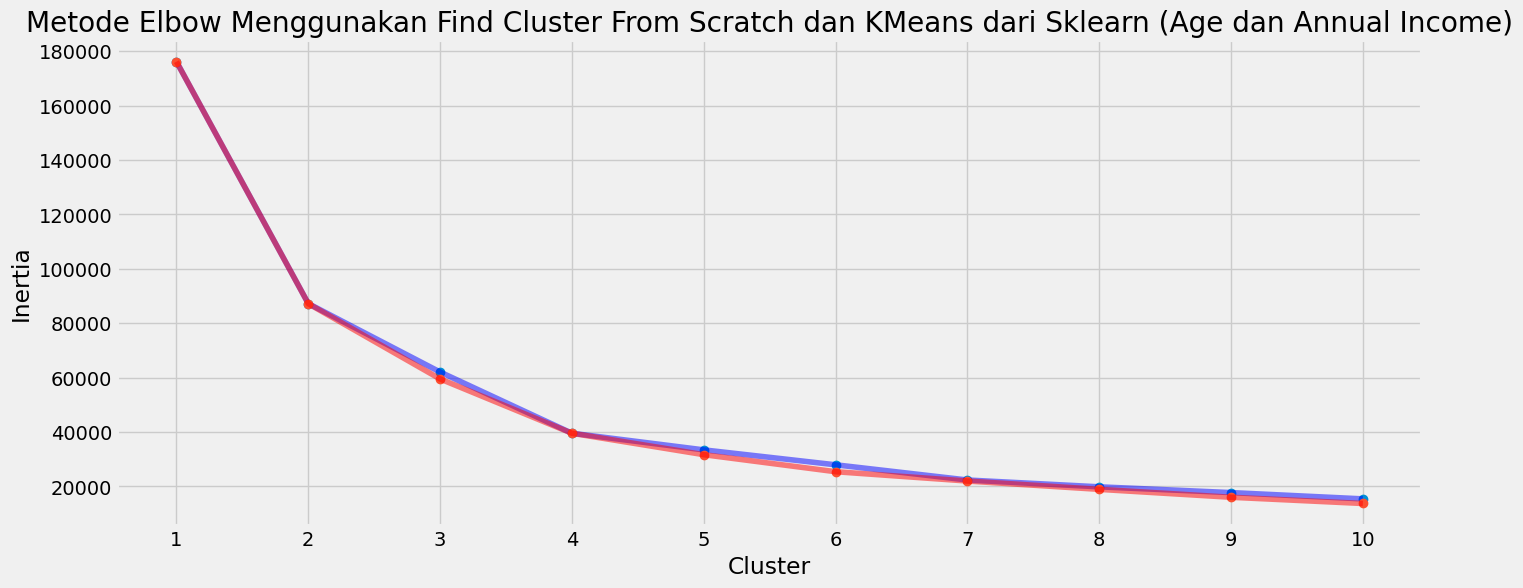

In [329]:
X1 = data[['Age', 'Annual Income (k$)']] # membuat sebuah variabel X1 yang berisi data Age dan Annual Income
k_optimum(X1) # memanggil fungsi k_optimum dengan parameter X1


Center Data Untuk Setiap Cluster Dengan Find Cluster From Scratch


,Age,Annual Income (k$)
0,55.814815,51.777778
1,30.346939,29.265306
2,31.958904,72.958904
3,39.000000,106.500000


Center Data Untuk Setiap Cluster Dengan KMeans dari Sklearn


,Age,Annual Income (k$)
0,31.958904,72.958904
1,55.814815,51.777778
2,30.346939,29.265306
3,39.000000,106.500000


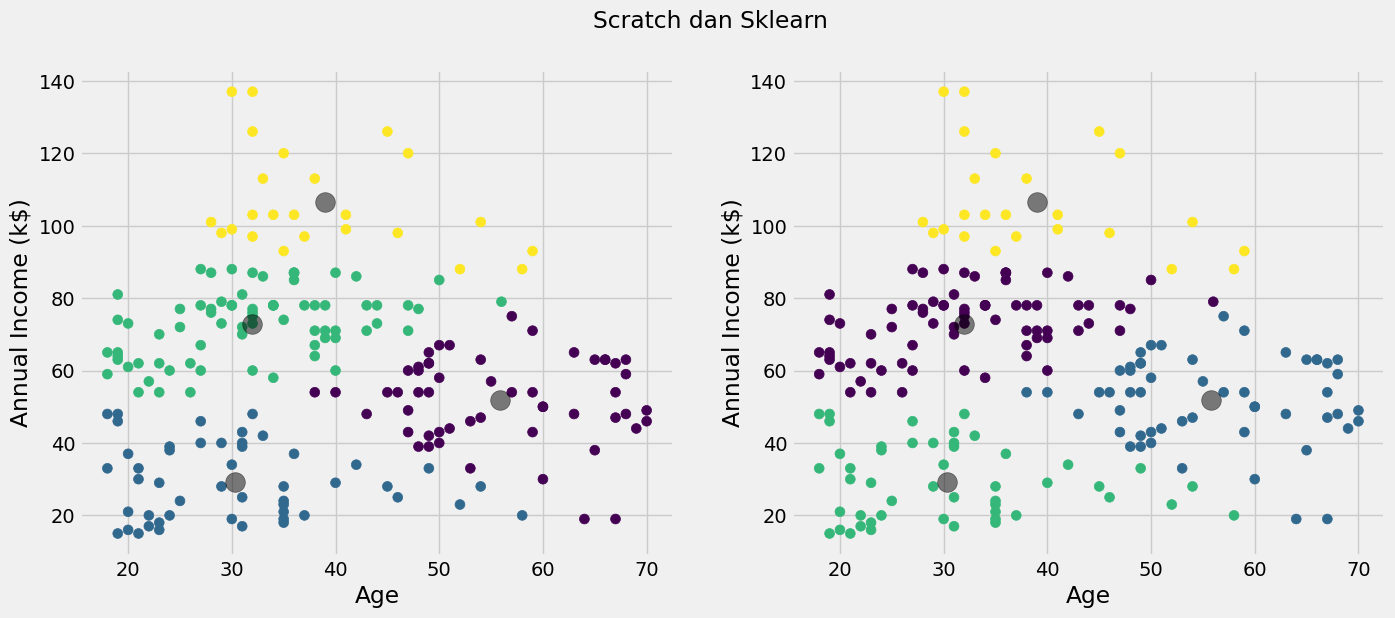

In [330]:
clustering(X1, 4) # memanggil fungsi clustering dengan parameter X1 dan 4

### 4.3.2 Segmentasi Pelanggan Berdasarkan Age dan Spending Score

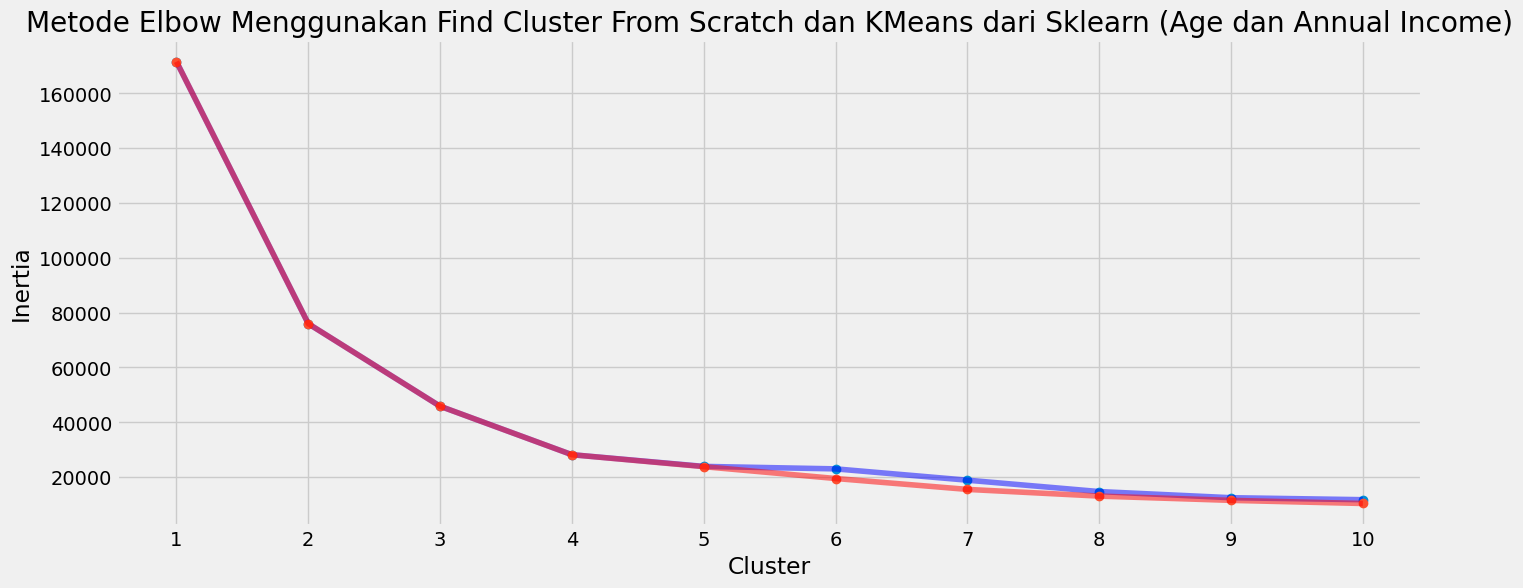

In [331]:
X2 = data[['Age', 'Spending Score (1-100)']] # membuat sebuah variabel X2 yang berisi data Age dan Spending Score
k_optimum(X2) # memanggil fungsi k_optimum dengan parameter X2

Center Data Untuk Setiap Cluster Dengan Find Cluster From Scratch


,Age,Annual Income (k$)
0,55.408163,48.040816
1,30.175439,82.350877
2,43.291667,15.020833
3,27.326087,49.369565


Center Data Untuk Setiap Cluster Dengan KMeans dari Sklearn


,Age,Annual Income (k$)
0,27.617021,49.148936
1,55.708333,48.229167
2,30.175439,82.350877
3,43.291667,15.020833


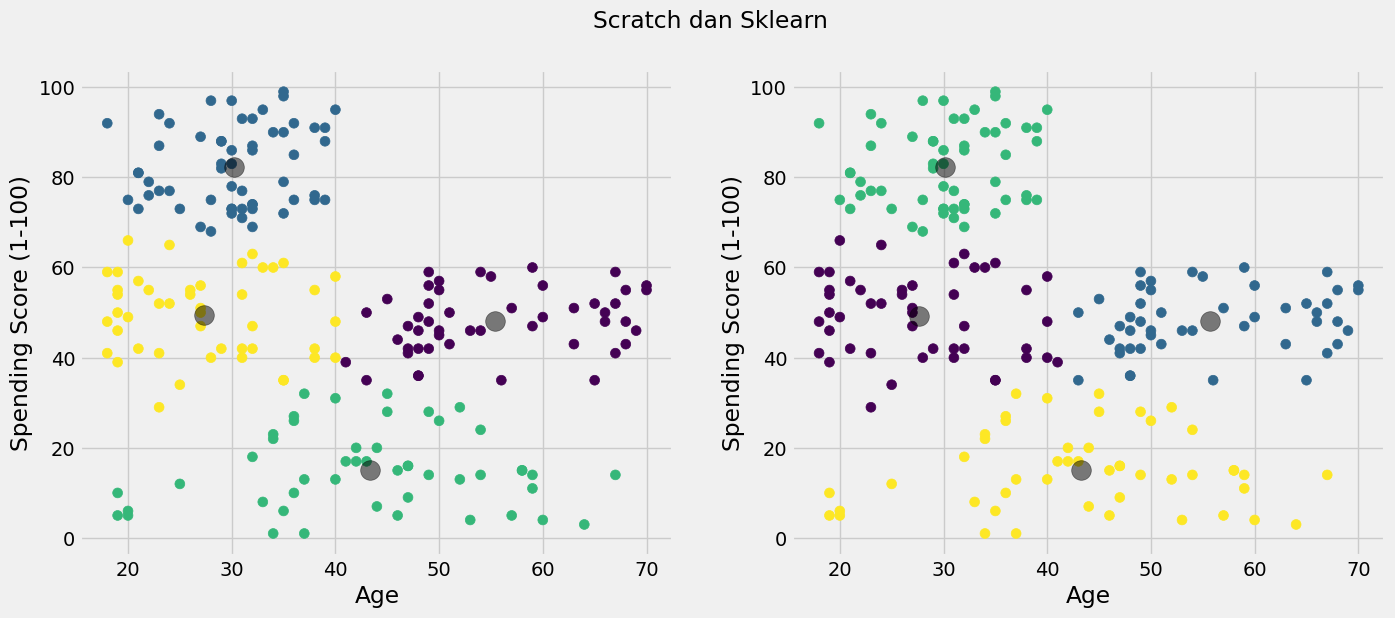

In [332]:
clustering(X2, 4) # memanggil fungsi clustering dengan parameter X2 dan 4

### 4.3.3 Segmentasi Pelanggan Berdasarkan Annual Income dan Spending Score

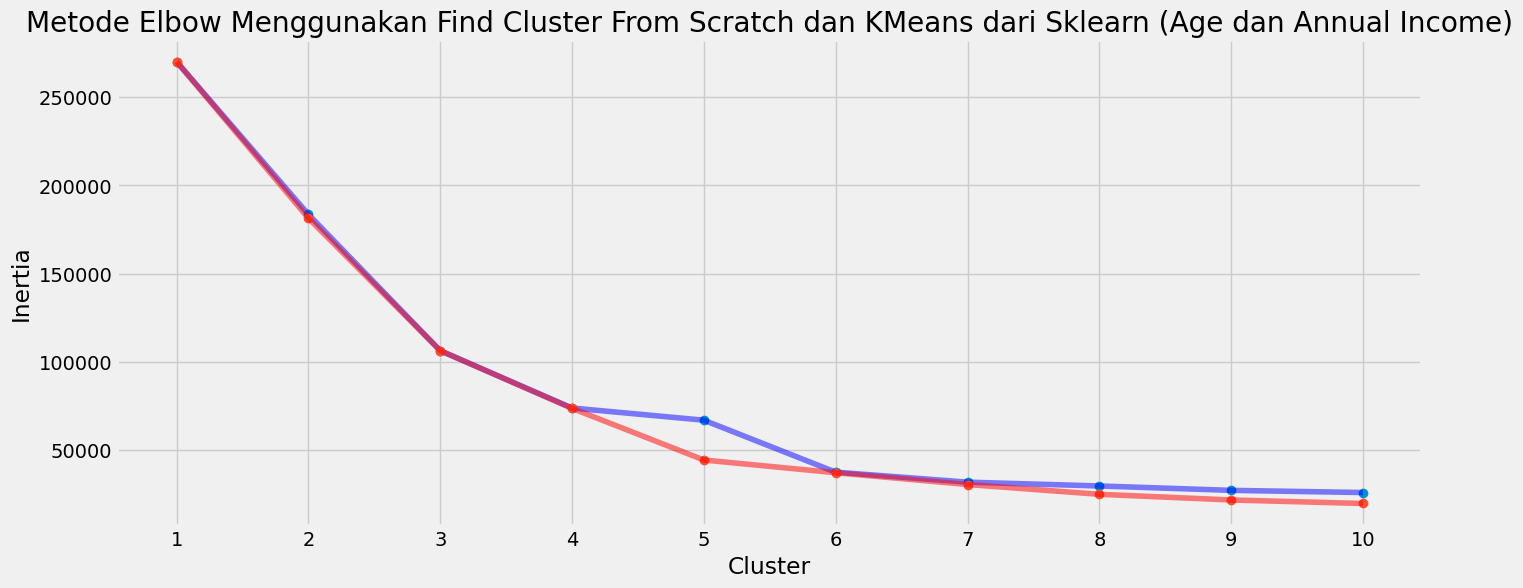

In [333]:
X3 = data[['Annual Income (k$)', 'Spending Score (1-100)']] # membuat sebuah variabel X3 yang berisi data Annual Income dan Spending Score
k_optimum(X3) # memanggil fungsi k_optimum dengan parameter X3

Center Data Untuk Setiap Cluster Dengan Find Cluster From Scratch


,Age,Annual Income (k$)
0,48.168317,43.396040
1,25.727273,79.363636
2,87.000000,18.631579
3,114.714286,78.428571
4,80.375000,82.937500


Center Data Untuk Setiap Cluster Dengan KMeans dari Sklearn


,Age,Annual Income (k$)
0,88.200000,17.114286
1,26.304348,20.913043
2,55.296296,49.518519
3,86.538462,82.128205
4,25.727273,79.363636


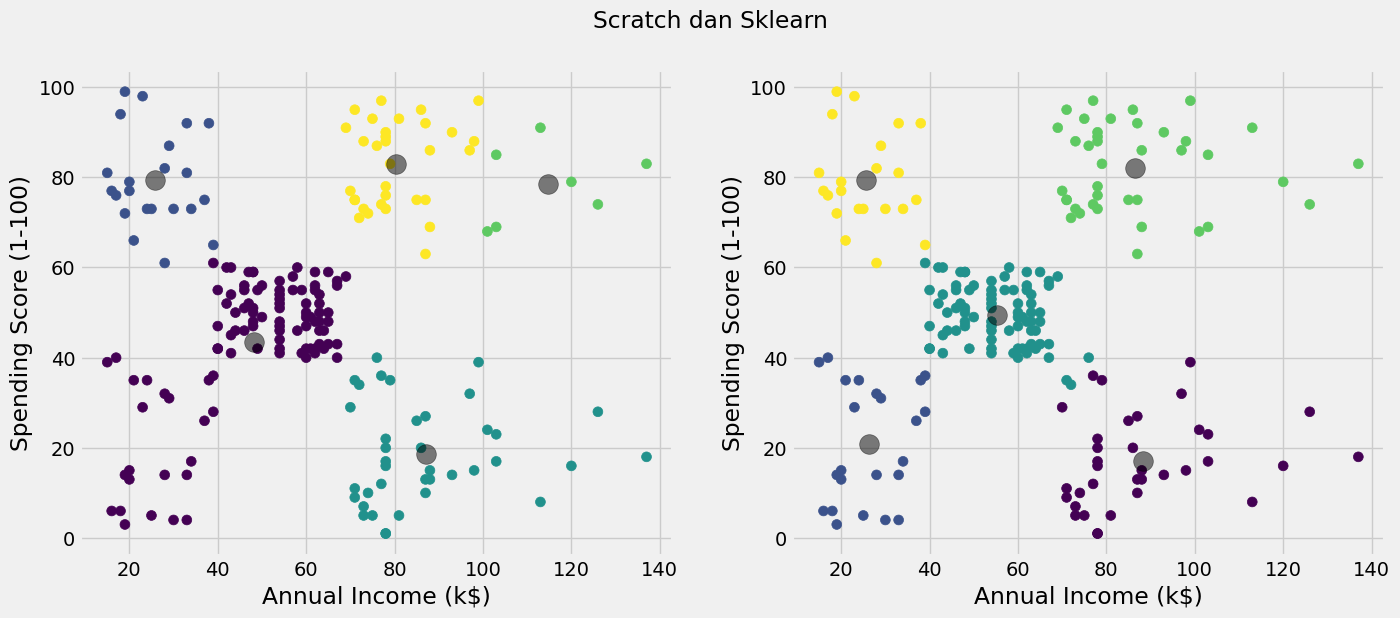

In [334]:
clustering(X3, 5) # memanggil fungsi clustering dengan parameter X3 dan 5

### 4.3.4 Segmentasi Pelanggan Berdasarkan Age, Annual Income dan Spending Score

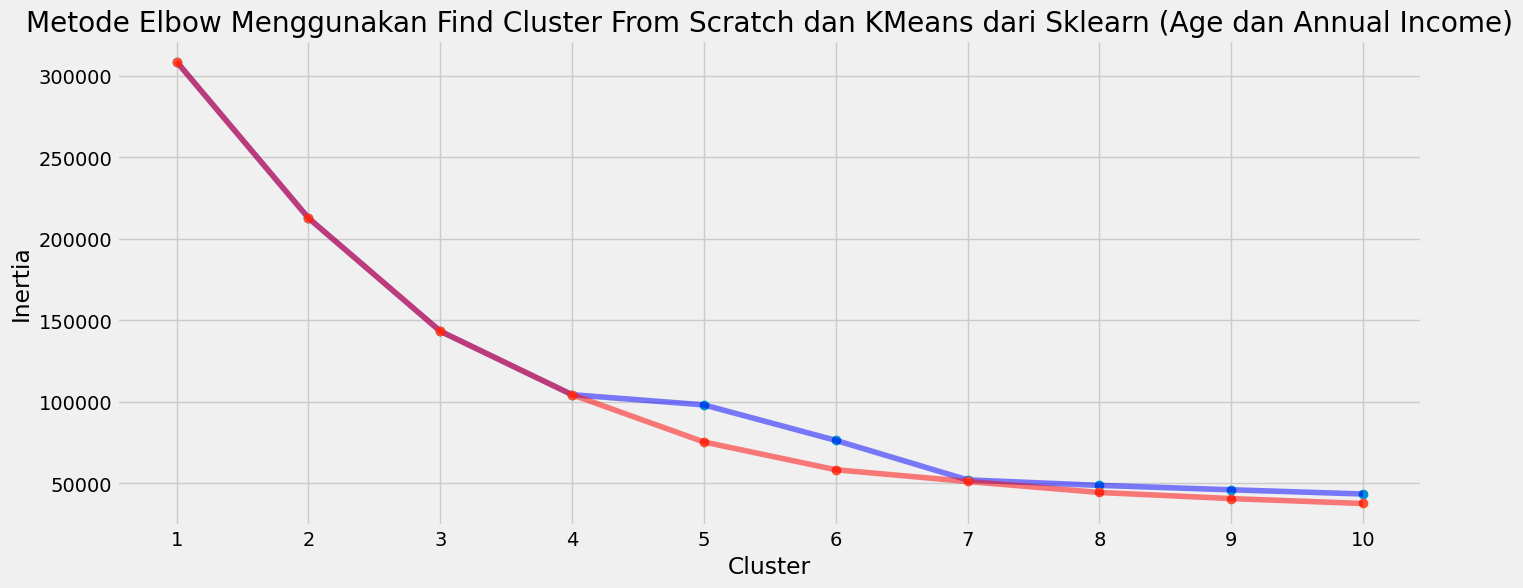

In [335]:
X4 = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] # membuat sebuah variabel X4 yang berisi data Age, Annual Income dan Spending Score
k_optimum(X4) # memanggil fungsi k_optimum dengan parameter X4

In [336]:
X4 = X4.values # mengubah X4 menjadi array
# Clustering Menggunakan Find Cluster From Scratch
_, centers_scratch, labels_scratch = find_clusters(X4, 6) # menemukan cluster dari data dengan nilai k = 5 # Clustering Menggunakan KMeans dari Sklearn
data_baru = data.copy() # membuat sebuah dataframe baru yang berisi data
data_baru['segmentasi'] = labels_scratch # menambahkan kolom segmentasi pada dataframe data_baru
filename = 'scratch_' + data.columns[0] + ', ' + data.columns[1] + ' dan ' + data.columns[2] + ' dengan ' + str(6) + ' cluster.csv' # membuat sebuah variabel filename yang berisi nama kolom pada data dan nilai n_clusters
data_baru.to_csv(filename, index=False) # menyimpan dataframe data_baru ke dalam file csv


trace1 = go.Scatter3d( # membuat plot 3D dengan find cluster from scratch
    x= X4[:, 0], # berfungsi untuk mengatur nilai x pada plot
    y= X4[:, 1], # berfungsi untuk mengatur nilai y pada plot
    z= X4[:, 2], # berfungsi untuk mengatur nilai z pada plot
    mode='markers', # berfungsi untuk mengatur mode plot
        marker=dict( # berfungsi untuk mengatur warna pada plot
        color = labels_scratch, # berfungsi untuk mengatur warna pada plot
        size= 20, # berfungsi untuk mengatur ukuran plot
        line=dict( # berfungsi untuk mengatur warna garis pada plot
            color= labels_scratch, # berfungsi untuk mengatur warna garis pada plot
            width= 12 # berfungsi untuk mengatur lebar garis pada plot
        ), 
        opacity=0.8 # berfungsi untuk mengatur transparansi plot
        )
)
data_plot = [trace1] # berfungsi untuk mengatur data yang akan ditampilkan pada plot
layout = go.Layout(
    title= 'Clusters', # berfungsi untuk memberikan judul pada plot
    scene = dict(
            xaxis = dict(title  = 'Age'), # berfungsi untuk memberikan label pada sumbu x
            yaxis = dict(title  = 'Spending Score'), # berfungsi untuk memberikan label pada sumbu y
            zaxis = dict(title  = 'Annual Income') # berfungsi untuk memberikan label pada sumbu z
        )
)
fig = go.Figure(data=data_plot, layout=layout) # berfungsi untuk mengatur data dan layout pada plot
py.offline.iplot(fig) # berfungsi untuk menampilkan plot

In [337]:
# Clustering Menggunakan KMeans dari Sklearn
k_means = KMeans(n_clusters=6) # membuat objek KMeans dengan nilai k = 5
y_kmeans = k_means.fit_predict(X4) # menemukan cluster dari data
data_baru = data.copy() # membuat sebuah dataframe baru yang berisi data
data_baru['segmentasi'] = y_kmeans # menambahkan kolom segmentasi pada dataframe data_baru
filename = 'kmeans_' + data.columns[0] + ', ' + data.columns[1] + ' dan ' + data.columns[2] + ' dengan ' + str(6) + ' cluster.csv' # membuat sebuah variabel filename yang berisi nama kolom pada data dan nilai n_clusters
data_baru.to_csv(filename, index=False) # menyimpan dataframe data_baru ke dalam file csv

trace1 = go.Scatter3d( # membuat plot 3D dengan find cluster from scratch
    x= X4[:, 0], # berfungsi untuk mengatur nilai x pada plot
    y= X4[:, 1], # berfungsi untuk mengatur nilai y pada plot
    z= X4[:, 2], # berfungsi untuk mengatur nilai z pada plot
    mode='markers', # berfungsi untuk mengatur mode plot
        marker=dict( # berfungsi untuk mengatur warna pada plot
        color = y_kmeans, # berfungsi untuk mengatur warna pada plot
        size= 20, # berfungsi untuk mengatur ukuran plot
        line=dict( # berfungsi untuk mengatur warna garis pada plot
            color= y_kmeans, # berfungsi untuk mengatur warna garis pada plot
            width= 12 # berfungsi untuk mengatur lebar garis pada plot
        ), 
        opacity=0.8 # berfungsi untuk mengatur transparansi plot
        )
)
data_plot = [trace1] # berfungsi untuk mengatur data yang akan ditampilkan pada plot
layout = go.Layout(
    title= 'Clusters', # berfungsi untuk memberikan judul pada plot
    scene = dict(
            xaxis = dict(title  = 'Age'), # berfungsi untuk memberikan label pada sumbu x
            yaxis = dict(title  = 'Spending Score'), # berfungsi untuk memberikan label pada sumbu y
            zaxis = dict(title  = 'Annual Income') # berfungsi untuk memberikan label pada sumbu z
        )
)
fig = go.Figure(data=data_plot, layout=layout) # berfungsi untuk mengatur data dan layout pada plot
py.offline.iplot(fig) # berfungsi untuk menampilkan plot

# 5. Kesimpulan

Clustering menggunakan Scratch dan algoritma popoler yakni k-means menghasilakan segmentasi pelanggan yang tidak jauh berbeda